In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Muones/muon.data"
data = pd.read_csv(data, delimiter=' ')

print(data)

        40000  1715382134
0       40000  1715382135
1       40000  1715382136
2       40000  1715382137
3       40000  1715382138
4       40000  1715382139
...       ...         ...
503741  40000  1724170992
503742  40000  1724170993
503743  40000  1724170994
503744  40000  1724170995
503745  40000  1724170996

[503746 rows x 2 columns]


In [210]:
df=pd.DataFrame(data)
df=df.rename(columns={'40000':'Tiempo','1715382134':'Fecha'})
df

,Tiempo,Fecha
0,40000,1715382135
1,40000,1715382136
2,40000,1715382137
3,40000,1715382138
4,40000,1715382139
...,...,...
503741,40000,1724170992
503742,40000,1724170993
503743,40000,1724170994
503744,40000,1724170995


In [211]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]*10**(-3)
df1

,Tiempo
954,2.74
970,1.24
987,3.06
1003,3.78
1006,15.70
...,...
503065,0.94
503071,0.06
503145,3.22
503194,0.10


In [212]:
filas=len(df1)

In [267]:
conteo_df = df1.groupby('Tiempo').size().reset_index(name='Cantidad')
#conteo_df['Cantidad']=conteo_df['Cantidad'].max()-conteo_df['Cantidad']
conteo_df['Error Tiempo']=0.01
conteo_df['Error decay']=0.1
conteo_df

,Tiempo,Cantidad,Error Tiempo,Error decay
0,0.04,28,0.01,0.1
1,0.06,734,0.01,0.1
2,0.08,48,0.01,0.1
3,0.10,103,0.01,0.1
4,0.12,73,0.01,0.1
...,...,...,...,...
732,19.82,1,0.01,0.1
733,19.84,1,0.01,0.1
734,19.88,1,0.01,0.1
735,19.90,1,0.01,0.1


In [268]:
Time,Cantidad=np.array(conteo_df['Tiempo']), np.array(conteo_df['Cantidad'])

In [269]:
#plt.scatter(conteo_df['Cantidad'],conteo_df['Tiempo'], s=1)

In [270]:
Ter, Der=np.array(conteo_df['Error Tiempo']),np.array(conteo_df['Error decay'])

In [271]:
f_cum=np.cumsum(Cantidad)

In [272]:
decay=filas-f_cum
decay[-1]=1/10000000

Text(0, 0.5, 'Frecuencia')

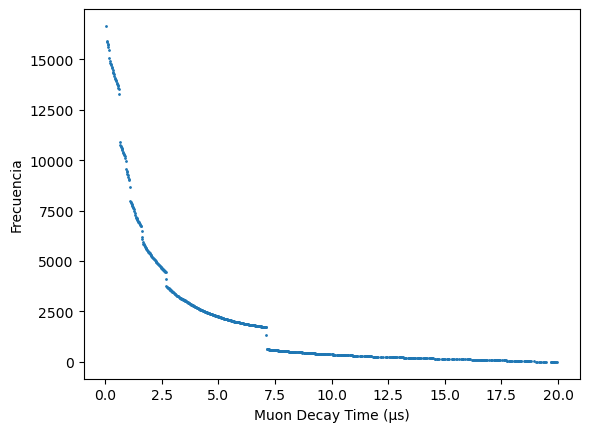

In [273]:
plt.scatter(Time, decay, s=1)
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')

In [274]:
#def expo(x,a,b):
 #   return a*np.exp(-x/b)

In [275]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t*b),  Time,decay)
incert =np.sqrt(np.diag(cov))

C:\Users\Personal\AppData\Local\Temp\ipykernel_28856\3852769991.py:1: RuntimeWarning: overflow encountered in exp
  param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t*b),  Time,decay)
C:\Users\Personal\AppData\Local\Temp\ipykernel_28856\3852769991.py:1: RuntimeWarning: overflow encountered in multiply
  param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-t*b),  Time,decay)


In [276]:
param, incert

(array([1.54697923e+04, 4.59268817e-01]),
 array([1.13393435e+02, 4.70958188e-03]))

In [277]:
1/param[1]

2.1773740421228576

In [278]:
x=np.linspace(0,20,10000)
#y=expo(x,param[0], param[1])
y=param[0]*np.exp(-x*param[1])
y

array([1.54697923e+04, 1.54555879e+04, 1.54413964e+04, ...,
       1.58900088e+00, 1.58754185e+00, 1.58608416e+00])

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión)')

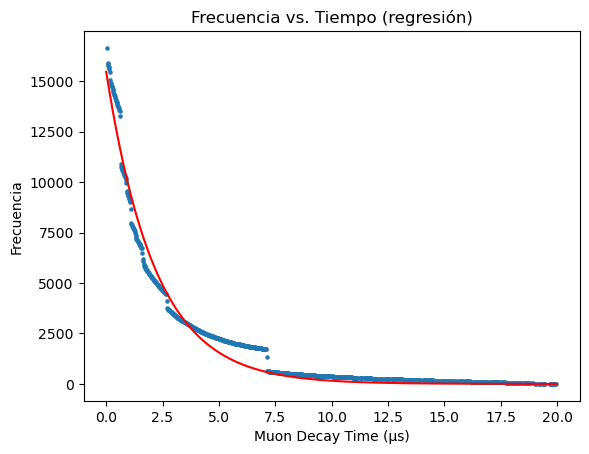

In [279]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión)')

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión e incertidumbres)')

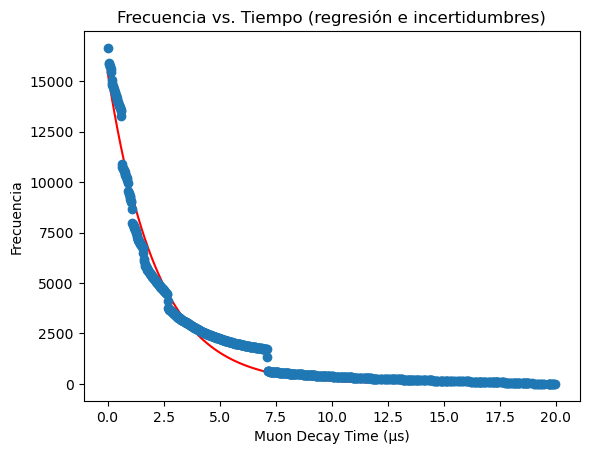

In [280]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión e incertidumbres)')

In [281]:
np.exp(-x/param[1])

array([1.00000000e+00, 9.95654286e-01, 9.91327458e-01, ...,
       1.23410535e-19, 1.22874228e-19, 1.22340252e-19])

In [282]:
y_fit=param[0]*np.exp(-Time*param[1])

In [283]:
residual=(decay-y_fit)

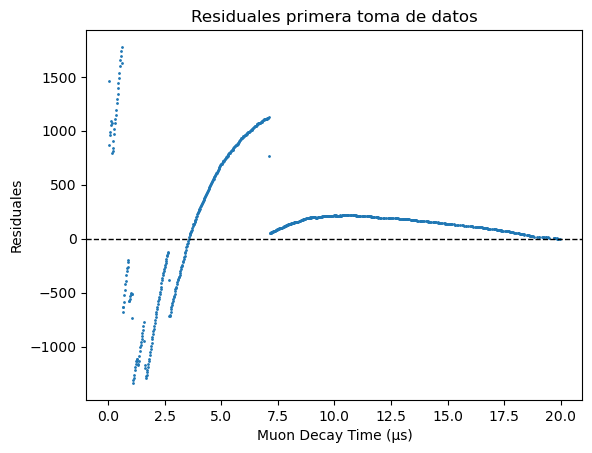

In [284]:
fig, ax = plt.subplots()
ax.set_title('Residuales primera toma de datos')
ax.scatter(Time,residual, s=1)
ax.set_xlabel('Muon Decay Time (µs)')
ax.set_ylabel('Residuales')
ax.axhline(0, color='black', linewidth=1, linestyle='--')